<a href="https://colab.research.google.com/github/im-adamya-vatsalya-sharma-09/ML-Project/blob/main/ML_Project_on_System_Threat_Forecaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

system_threat_forecaster_path = kagglehub.competition_download('System-Threat-Forecaster')

print('Data source import complete.')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', '{:.2f}'.format)
df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
df.shape

(100000, 76)

## Exploratory Data Analysis (EDA)
### Let's Perform EDA on our dataset before moving forward to start doing Preprocessing steps

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)  # If you also want to ignore RuntimeWarnings


In [ ]:
df.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
       'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutio

In [ ]:
#Length of total number of categorical columns in our dataset
len(df.select_dtypes(include=['int64', 'float64']).columns)

48

In [ ]:
#How many unique versions of the operating system are present in the dataset?
df['OSVersion'].nunique()

7

In [ ]:
#What is the maximum value of the feature “NumAntivirusProductsInstalled”?
df['NumAntivirusProductsInstalled'].max()

5.0

In [ ]:
#In how many systems owned by gamers has target = 1?
df[(df['target'] == 1) & (df['IsGamer'] == 1)]['MachineID'].nunique()

16272

In [ ]:
#For observations where the feature “IsPassiveModeEnabled” equals “1,” what is the most frequent value of the feature “RealTimeProtectionState”?
df[df['IsPassiveModeEnabled'] == 1]['RealTimeProtectionState'].mode()

0   0.00
Name: RealTimeProtectionState, dtype: float64

In [ ]:
#How many systems have a screen resolution of 1366 x 768?
df[(df['PrimaryDisplayResolutionHorizontal'] == 1366) & (df['PrimaryDisplayResolutionVertical'] == 768)]['MachineID'].nunique()

51340

In [ ]:
#What is the 50th percentile value of “TotalPhysicalRAMMB”?
df['TotalPhysicalRAMMB'].quantile(0.5)

4096.0

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [ ]:
df.describe()

IsBetaUser  RealTimeProtectionState  IsPassiveModeEnabled  \
count   100000.00                 99934.00             100000.00   
mean         0.00                     6.85                  0.02   
std          0.00                     1.02                  0.13   
min          0.00                     0.00                  0.00   
25%          0.00                     7.00                  0.00   
50%          0.00                     7.00                  0.00   
75%          0.00                     7.00                  0.00   
max          0.00                     8.00                  1.00   

       AntivirusConfigID  NumAntivirusProductsInstalled  \
count           99924.00                       99924.00   
mean            47975.71                           1.33   
std             13803.32                           0.52   
min                39.00                           1.00   
25%             49480.00                           1.00   
50%             53447.00                           1.00   
75%             53447.00                           2.00   
max             70490.00                           5.00   

       NumAntivirusProductsEnabled    HasTpm  CountryID    CityID  \
count                     99924.00 100000.00  100000.00  99377.00   
mean                          1.02      1.00     108.08  81029.94   
std                           0.16      0.06      63.06  48944.03   
min                           0.00      0.00       1.00      7.00   
25%                           1.00      1.00      51.00  36694.00   
50%                           1.00      1.00      97.00  82373.00   
75%                           1.00      1.00     162.00 122835.00   
max                           4.00      1.00     222.00 167957.00   

       GeoRegionID  LocaleEnglishNameID  OSBuildNumber  OSProductSuite  \
count    100000.00            100000.00      100000.00       100000.00   
mean        169.74               122.70       15917.21          578.40   
std          89.19                69.24        1943.42          247.24   
min           1.00                 1.00        7601.00           16.00   
25%          89.00                74.00       16299.00          256.00   
50%         181.00                88.00       16299.00          768.00   
75%         267.00               182.00       17134.00          768.00   
max         296.00               283.00       17763.00          784.00   

       IsSystemProtected  AutoSampleSubmissionEnabled    SMode  IEVersionID  \
count           99924.00                    100000.00 99019.00     99893.00   
mean                0.96                         0.00     0.00       124.05   
std                 0.21                         0.00     0.02        33.54   
min                 0.00                         0.00     0.00        39.00   
25%                 1.00                         0.00     0.00       111.00   
50%                 1.00                         0.00     0.00       135.00   
75%                 1.00                         0.00     0.00       137.00   
max                 1.00                         0.00     1.00       429.00   

       FirewallEnabled  EnableLUA  OEMNameID  OEMModelID  ProcessorCoreCount  \
count         99834.00   99981.00   99788.00    99772.00            99915.00   
mean              0.98       1.00    2209.57   238780.91                4.01   
std               0.14       0.27    1300.86    71708.48                2.03   
min               0.00       0.00      46.00       22.00                1.00   
25%               1.00       1.00    1443.00   189586.00                2.00   
50%               1.00       1.00    2102.00   246528.00                4.00   
75%               1.00       1.00    2668.00   302767.00                4.00   
max               1.00      48.00    6062.00   345324.00               64.00   

       ProcessorManufacturerID  ProcessorModelID  PrimaryDiskCapacityMB  \
count                 99915.00          99915.00               99

In [ ]:
df.describe(include = ["object"])

MachineID   ProductName EngineVersion  \
count                             100000        100000        100000   
unique                             99835             2            37   
top     8e0523438a5ca48323f50b2c47f6d31a  win8defender   1.1.15200.1   
freq                                   2         99771         45219   

             AppVersion SignatureVersion PlatformType Processor OSVersion  \
count            100000           100000       100000    100000    100000   
unique               69             2735            4         3         7   
top     4.18.1807.18075     1.273.1420.0    windows10       x64  10.0.0.0   
freq              62119             1274        98344     91262     98368   

       OsPlatformSubRelease                                OSBuildLab  \
count                100000                                    100000   
unique                    9                                       281   
top                     rs4  17134.1.amd64fre.rs4_release.180410-1804   
freq                  45837                                     42964   

       SKUEditionName MDC2FormFactor     DeviceFamily PrimaryDiskType  \
count          100000         100000           100000           99977   
unique              8             11                2               4   
top              Home       Notebook  Windows.Desktop             HDD   
freq            62863          64547            99971           66202   

       ChassisType PowerPlatformRole NumericOSVersion OSArchitecture  \
count        99998            100000           100000         100000   
unique          28                 9              221              3   
top       Notebook            Mobile   10.0.17134.228          amd64   
freq         59459             69874            17069          91281   

           OSBranch OSEdition OSSkuFriendlyName OSInstallType  \
count        100000    100000            100000        100000   
unique           13        20                18             9   
top     rs4_release      Core              CORE    UUPUpgrade   
freq          46909     39275             39273         32033   

       AutoUpdateOptionsName OSGenuineState LicenseActivationChannel  \
count                 100000         100000                   100000   
unique                     6              4                        6   
top                 FullAuto     IS_GENUINE                   Retail   
freq                   45154          89860                    52195   

       FlightRing               DateAS      DateOS  
count      100000               100000       99976  
unique          7                 2695         112  
top        Retail  2018-08-15 06:29:00  2018-08-14  
freq        94153                 1274       20905

In [ ]:
df.describe(include=['float64','int64'])

IsBetaUser  RealTimeProtectionState  IsPassiveModeEnabled  \
count   100000.00                 99934.00             100000.00   
mean         0.00                     6.85                  0.02   
std          0.00                     1.02                  0.13   
min          0.00                     0.00                  0.00   
25%          0.00                     7.00                  0.00   
50%          0.00                     7.00                  0.00   
75%          0.00                     7.00                  0.00   
max          0.00                     8.00                  1.00   

       AntivirusConfigID  NumAntivirusProductsInstalled  \
count           99924.00                       99924.00   
mean            47975.71                           1.33   
std             13803.32                           0.52   
min                39.00                           1.00   
25%             49480.00                           1.00   
50%             53447.00                           1.00   
75%             53447.00                           2.00   
max             70490.00                           5.00   

       NumAntivirusProductsEnabled    HasTpm  CountryID    CityID  \
count                     99924.00 100000.00  100000.00  99377.00   
mean                          1.02      1.00     108.08  81029.94   
std                           0.16      0.06      63.06  48944.03   
min                           0.00      0.00       1.00      7.00   
25%                           1.00      1.00      51.00  36694.00   
50%                           1.00      1.00      97.00  82373.00   
75%                           1.00      1.00     162.00 122835.00   
max                           4.00      1.00     222.00 167957.00   

       GeoRegionID  LocaleEnglishNameID  OSBuildNumber  OSProductSuite  \
count    100000.00            100000.00      100000.00       100000.00   
mean        169.74               122.70       15917.21          578.40   
std          89.19                69.24        1943.42          247.24   
min           1.00                 1.00        7601.00           16.00   
25%          89.00                74.00       16299.00          256.00   
50%         181.00                88.00       16299.00          768.00   
75%         267.00               182.00       17134.00          768.00   
max         296.00               283.00       17763.00          784.00   

       IsSystemProtected  AutoSampleSubmissionEnabled    SMode  IEVersionID  \
count           99924.00                    100000.00 99019.00     99893.00   
mean                0.96                         0.00     0.00       124.05   
std                 0.21                         0.00     0.02        33.54   
min                 0.00                         0.00     0.00        39.00   
25%                 1.00                         0.00     0.00       111.00   
50%                 1.00                         0.00     0.00       135.00   
75%                 1.00                         0.00     0.00       137.00   
max                 1.00                         0.00     1.00       429.00   

       FirewallEnabled  EnableLUA  OEMNameID  OEMModelID  ProcessorCoreCount  \
count         99834.00   99981.00   99788.00    99772.00            99915.00   
mean              0.98       1.00    2209.57   238780.91                4.01   
std               0.14       0.27    1300.86    71708.48                2.03   
min               0.00       0.00      46.00       22.00                1.00   
25%               1.00       1.00    1443.00   189586.00                2.00   
50%               1.00       1.00    2102.00   246528.00                4.00   
75%               1.00       1.00    2668.00   302767.00                4.00   
max               1.00      48.00    6062.00   345324.00               64.00   

       ProcessorManufacturerID  ProcessorModelID  PrimaryDiskCapacityMB  \
count                 99915.00          99915.00               99

In [ ]:
#Creating a list of categorical features
categorical_features = [col for col in df.columns if df[col].dtype == 'object']
print(categorical_features)
#printing the number of categorical features
print(len(categorical_features))

['MachineID', 'ProductName', 'EngineVersion', 'AppVersion', 'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion', 'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName', 'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType', 'ChassisType', 'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallType', 'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel', 'FlightRing', 'DateAS', 'DateOS']
28


In [ ]:
#Creating a list of Numerical Columns
numerical_features = [col for col in df.columns if df[col].dtype != 'object']
print(numerical_features)
print(len(numerical_features))

['IsBetaUser', 'RealTimeProtectionState', 'IsPassiveModeEnabled', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite', 'IsSystemProtected', 'AutoSampleSubmissionEnabled', 'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID', 'OSUILocaleID', 'IsPortableOS', 'IsFlightsDisabled', 'FirmwareManufacturerID', 'FirmwareVersionID', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdenti

In [ ]:
#Creating a list of numerical columns which have 2 unique values for Binary Analysis
binary_features = [col for col in numerical_features if df[col].nunique() == 2]
print(binary_features)
print(len(binary_features))

['IsPassiveModeEnabled', 'HasTpm', 'IsSystemProtected', 'SMode', 'FirewallEnabled', 'HasOpticalDiskDrive', 'IsPortableOS', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'target']
14


### Removing the duplicate rows for handling the Data Redundancy

In [ ]:
#pd.set_option('display.max_rows', None)
df.nunique()
print(df.shape)
df = df.drop_duplicates()
print(df.shape)
print("This difference betweent the numbers shows us that there were 165 Duplicate Rows")

(100000, 76)
(99835, 76)
This difference betweent the numbers shows us that there were 165 Duplicate Rows


In [ ]:
df.isnull().sum()

MachineID                               0
ProductName                             0
EngineVersion                           0
AppVersion                              0
SignatureVersion                        0
IsBetaUser                              0
RealTimeProtectionState                66
IsPassiveModeEnabled                    0
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
HasTpm                                  0
CountryID                               0
CityID                                623
GeoRegionID                             0
LocaleEnglishNameID                     0
PlatformType                            0
Processor                               0
OSVersion                               0
OSBuildNumber                           0
OSProductSuite                          0
OsPlatformSubRelease                    0
OSBuildLab                              0
SKUEditionName                    

In [ ]:
df.isnull().sum().sum()

6533

In [ ]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])

# Calculate total missing values in categorical columns
total_missing = categorical_columns.isnull().sum().sum()
print('Total Number of Missing Values in Categorical Variable is', total_missing)

Total Number of Missing Values in Categorical Variable is 49


In [ ]:
# Select only categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate total missing values in categorical columns
total_missing = numerical_columns.isnull().sum().sum()
print('Total Number of Missing Values in Numerical Variable is', total_missing)

Total Number of Missing Values in Numerical Variable is 6484


In [ ]:
df.nunique().sum()

205374

In [ ]:
import pandas as pd

# Select numerical columns
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['target'], inplace=False)
y = df['target']

# Compute the correlation of each feature with the target variable
correlation = X.corrwith(y).abs()  # Take absolute values to consider both +ve and -ve correlation

# Select the top 30 features with the highest correlation
top_features = correlation.nlargest(30).index

# Create a new dataframe with selected features
df_num_filtered = df[top_features]

print(df_num_filtered.columns)



Index(['NumAntivirusProductsInstalled', 'AntivirusConfigID',
       'TotalPhysicalRAMMB', 'IsAlwaysOnAlwaysConnectedCapable',
       'IsSystemProtected', 'IsGamer', 'ProcessorCoreCount',
       'PrimaryDiskCapacityMB', 'RealTimeProtectionState', 'IsTouchEnabled',
       'IsPassiveModeEnabled', 'NumAntivirusProductsEnabled',
       'IsVirtualDevice', 'OSBuildNumberOnly', 'PrimaryDisplayDiagonalInches',
       'OSBuildNumber', 'PrimaryDisplayResolutionHorizontal', 'IEVersionID',
       'HasOpticalDiskDrive', 'ProcessorModelID', 'FirmwareManufacturerID',
       'OSProductSuite', 'IsPenCapable', 'RegionIdentifier',
       'InternalBatteryNumberOfCharges', 'SMode', 'LocaleEnglishNameID',
       'SystemVolumeCapacityMB', 'OEMNameID',
       'PrimaryDisplayResolutionVertical'],
      dtype='object')


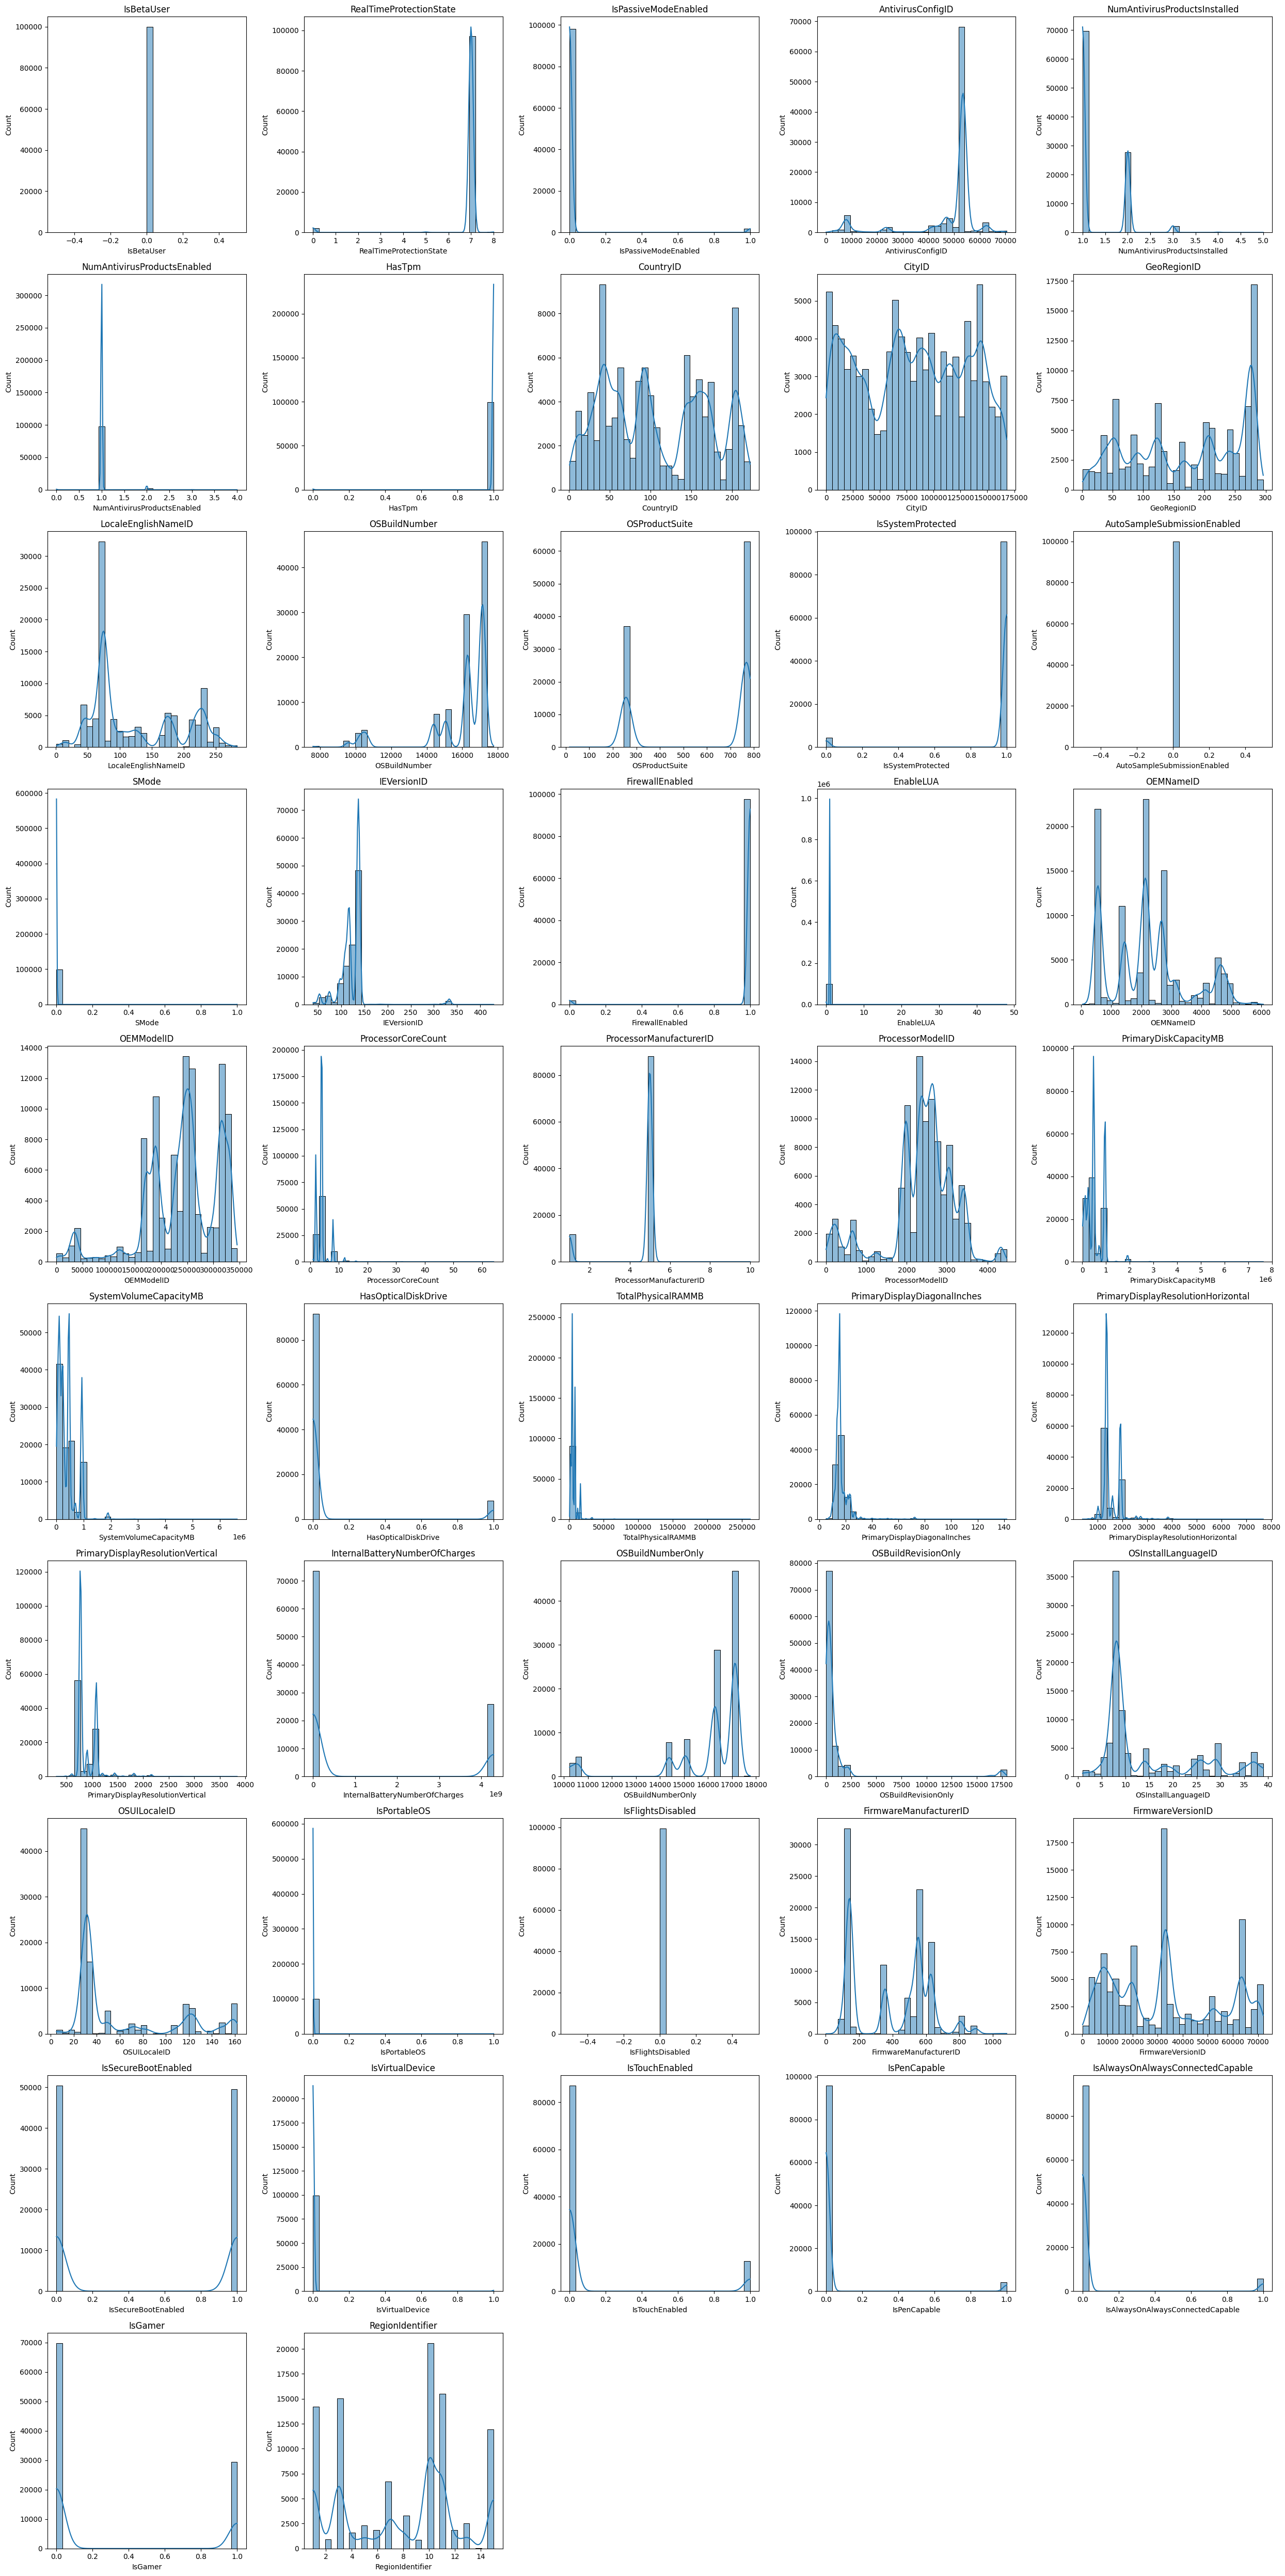

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

num_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns=['target'], inplace=False)

# Example numerical columns from your dataset
numerical_columns = [col for col in num_columns if num_columns[col].dtype in ['int64', 'float64']]

# Set a fixed number of columns per row
columns_per_row = 5
n_features = len(numerical_columns)  # Count of numerical features
n_rows = math.ceil(n_features / columns_per_row)

# Create subplots
fig, axes = plt.subplots(n_rows, columns_per_row, figsize=(5 * columns_per_row, 5 * n_rows))

# Flatten axes only if more than one subplot; otherwise, make it a list
if n_features == 1:
    axes = [axes]  # Wrap single axis in a list for consistent iteration
else:
    axes = axes.flatten()

# Plot each feature
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'{col}')

# Turn off unused axes if any
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


### **Key insights** ✨:  

### **1. Highly Skewed Distributions**  
Many numerical features, such as **ProcessorCoreCount, InternalBatteryNumberOfCharges, and TotalPhysicalRAMMB**, show **right-skewed distributions**. This suggests that a large number of devices have lower values, while fewer devices have much higher values.  

### **2. Binary Features with Imbalanced Classes**  
Some features, like **IsTouchEnabled**, **IsPenCapable**, **IsVirtualDevice**, **IsAlwaysOnConnectedCapable** show **highly imbalanced distributions** with most values concentrated around 0 or 1. This indicates that most devices either lack these features or have them enabled by default.  

### **3. Multi-modal Distributions**  
Certain variables, such as **OSBuildNumber, ProcessorModelID, and PrimaryDisplayResolution** etc, show **multiple peaks** in their distribution. This suggests different groups of users with distinct device configurations. This bring good variance to our data to learn.

### **4. Commonly Used Device Specifications**  
- **RAM (TotalPhysicalRAMMB):** Most systems have lower RAM, with a sharp drop-off at higher values.  
- **PrimaryDiskCapacityMB:** A majority of systems have relatively lower storage, but some devices have extremely high capacities.  
- **ProcessorCoreCount:** The majority of devices have a **low** core count, with a few high-end systems having more cores.  

### **5. Security & Protection Features**  
- **NumAntivirusProductsInstalled and RealTimeProtectionState**: Most users have only **one** antivirus installed and real-time protection enabled.  
- **IsSystemProtected and FirewallEnabled**: These show a strong concentration towards **1**, meaning most devices have security features turned on.  


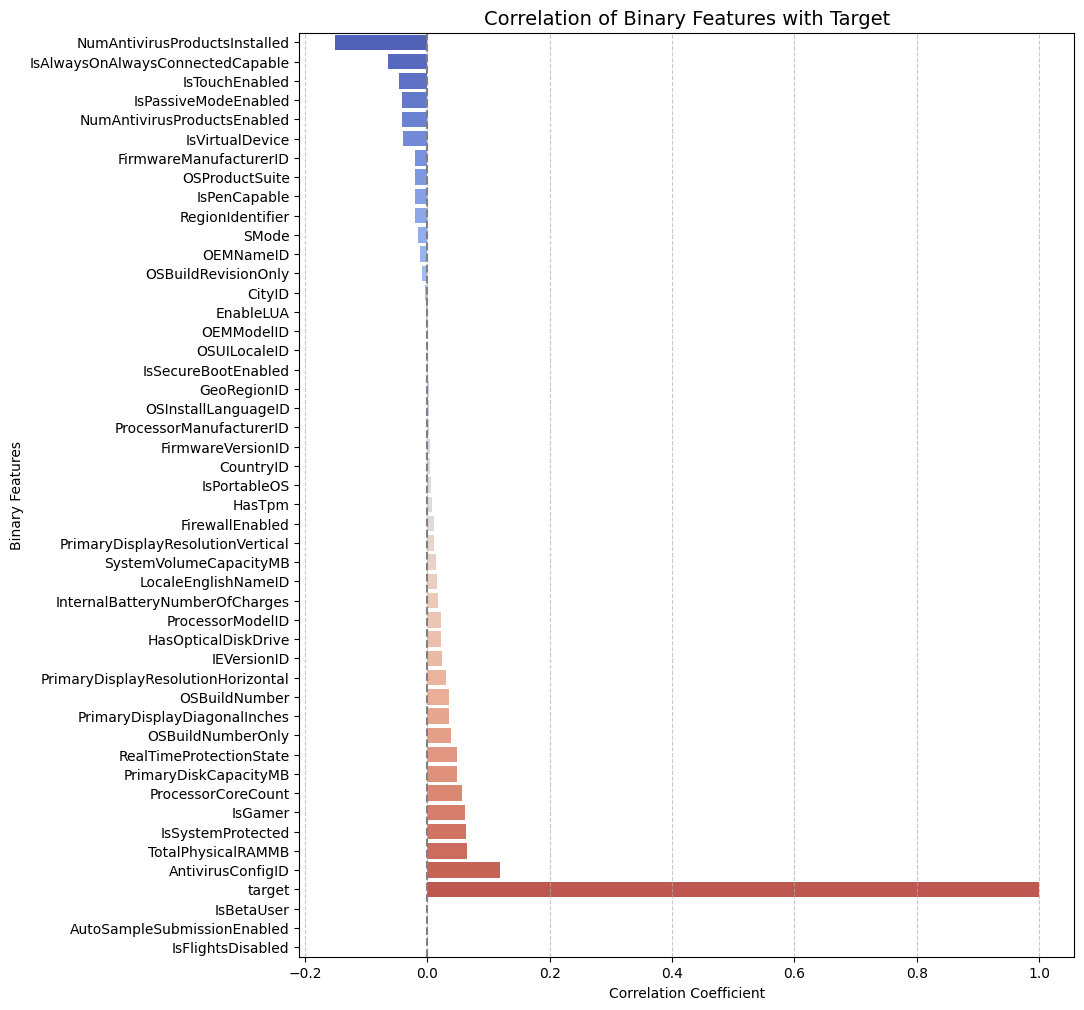

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select binary columns (values must be only 0 and 1)
num_col = [col for col in df.select_dtypes(include=['int64', 'float64'])]

# Compute correlation with target column
correlation_matrix = df[num_col].corrwith(df['target']).sort_values()

# Plot the correlation
plt.figure(figsize=(10, 12))
sns.barplot(x=correlation_matrix.values, y=correlation_matrix.index, palette='coolwarm')

# Title and labels
plt.title("Correlation of Binary Features with Target", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Binary Features")
plt.axvline(x=0, color='gray', linestyle='--')  # Reference line at 0
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()


### **Key Insights From the above Correlation Plot of Numerical Columns with Target Column:**

### **1️ Strongest Positive Correlations**
- **AutoSampleSubmissionEnabled** and **IsBetaUser** have the **strongest positive correlation** with the target.
- Other positively correlated features include:
  - TotalPhysicalRAMMB
  - IsSystemProtected
  - AntivirusConfigID

**Interpretation**:  
These features may be **associated with an increased likelihood of the target outcome** (depending on whether the target is a success/failure metric).

### **2️ Strongest Negative Correlations**
- **NumAntivirusProductsInstalled** has the **strongest negative correlation** with the target.
- Other negatively correlated features include:
  - IsAlwaysOnAlwaysConnectedCapable
  - IsTouchEnabled
  - IsVirtualDevice

**Interpretation**:  
Devices with multiple antivirus products, always-on capability, or touchscreens **may have a lower probability of the target outcome**.


### **3️ Most Features Have Low Correlation**
- A majority of the binary features have **very weak correlations (near 0)** with the target.
- This suggests that these features may have **little direct impact** on the target.

- Low-correlation features could be **less impactful** and may be candidates for removal in feature selection.


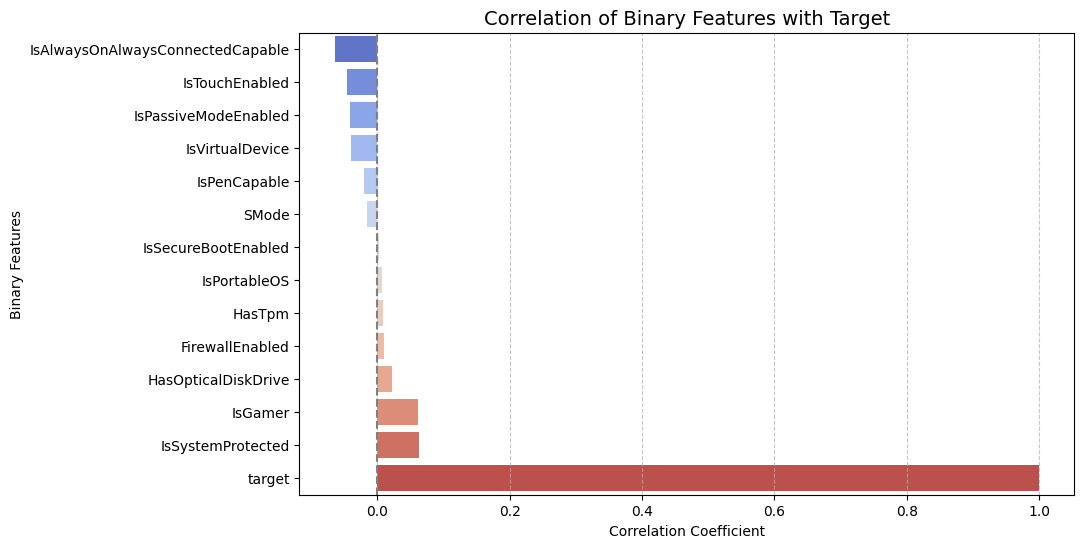

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select binary columns (values must be only 0 and 1)
binary_columns = [col for col in df.select_dtypes(include=['int64', 'float64']) if df[col].dropna().nunique() == 2]

# Compute correlation with target column
correlation_matrix = df[binary_columns].corrwith(df['target']).sort_values()

# Plot the correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix.values, y=correlation_matrix.index, palette='coolwarm')

# Title and labels
plt.title("Correlation of Binary Features with Target", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Binary Features")
plt.axvline(x=0, color='gray', linestyle='--')  # Reference line at 0
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()


### **Key Insights from the above Correlation Graph of Binary Features with Target:**

1. **Low Overall Correlation:**  
   - Most binary features have very weak correlation with the target variable.
   - This suggests that these features alone may not be strong predictors of the target class.

2. **Top Positively Correlated Features:**  
   - **"IsSystemProtected"** and **"IsGamer"** show the highest positive correlation with the target.
   - Devices where **system protection** is enabled and those categorized as **"gamer" devices** tend to be associated with higher target values (likely **1**).

3. **Top Negatively Correlated Features:**  
   - **"IsAlwaysOnAlwaysConnectedCapable"** has the strongest negative correlation with the target.
   - Other negatively correlated features include **"IsTouchEnabled"**, **"IsPassiveModeEnabled"**, and **"IsVirtualDevice"**.
   - This suggests that devices with these features (always-on connectivity, touch capability, passive mode, or being a virtual device) are more likely associated with the **target = 0** class.

4. **Near-Zero Correlation Features:**  
   - Features like **"HasTpm"**, **"IsPortableOS"**, **"FirewallEnabled"**, and **"IsSecureBootEnabled"** show very weak correlations.
   - These features have little to no impact on determining the target class.



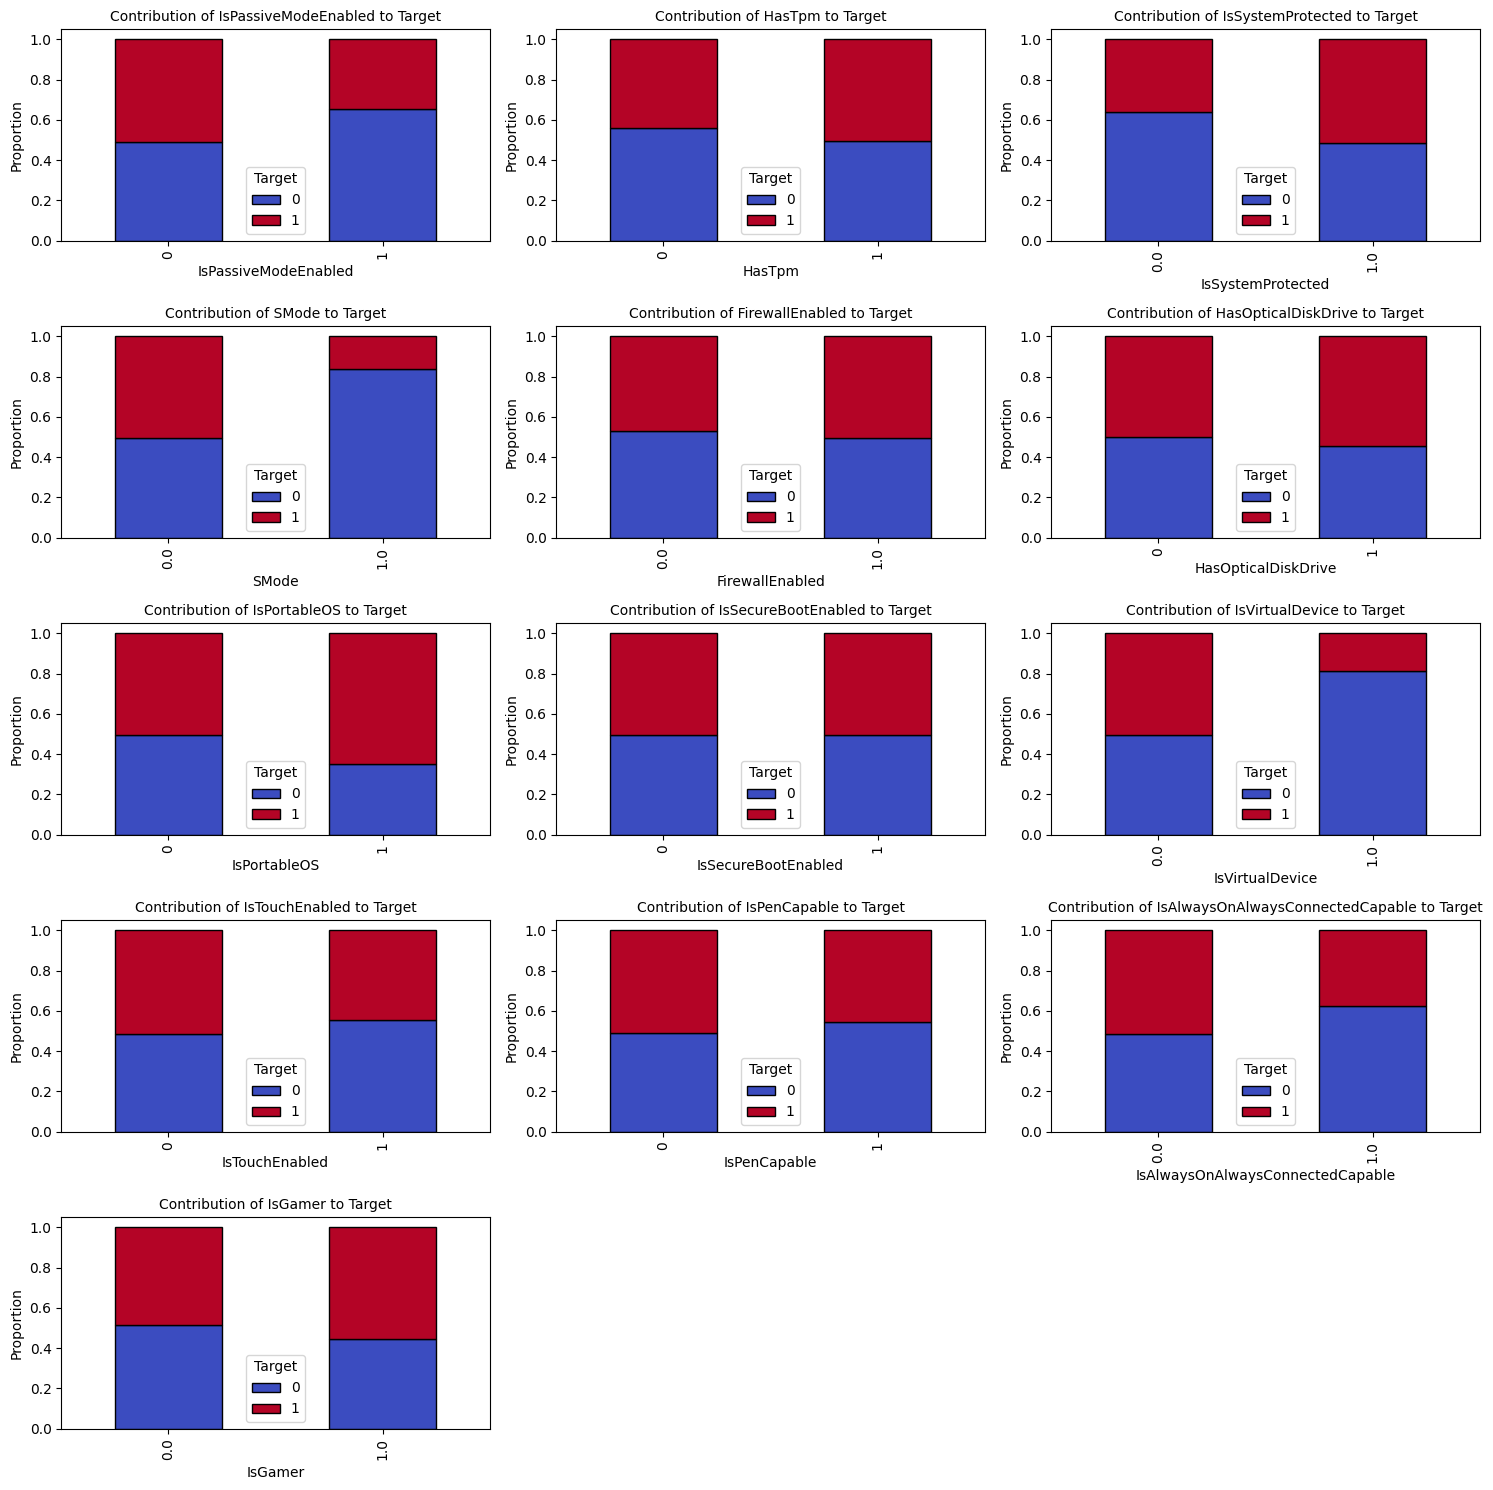

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter binary columns (excluding target itself)
binary_columns = df.select_dtypes(include=['int64', 'float64']).nunique()[lambda x: x == 2].index.tolist()
binary_columns.remove("target")  # Ensure target is excluded

# Determine the number of plots needed
num_plots = len(binary_columns)
cols = 3  # Set number of columns per row
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate rows dynamically

# Set figure size
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 3))

# Flatten axes for easy iteration (handles cases with fewer plots)
axes = axes.flatten()

# Loop through each binary column and plot
for i, col in enumerate(binary_columns):
    cross_tab = pd.crosstab(df[col], df['target'], normalize='index')  # Normalize to get proportions

    # Plot stacked bar chart
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i], colormap='coolwarm', edgecolor='black')

    axes[i].set_title(f"Contribution of {col} to Target", fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Proportion")
    axes[i].legend(title="Target", loc="best")

# Hide unused subplots (if any)
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


### **Key Insights from the Graphs**✨:  
These **stacked bar plots** display the relationship between **binary categorical features** (e.g., IsSystemProtected, HasTpm,IsGamer, etc.) and the **target variable (0 vs. 1)**.


### **1️ Proportion of Target Classes for Each Feature**  
- Each bar represents the proportion of Target = 0 (blue) and Target = 1 (red) for different binary features.
- If a feature shows a **significant difference** in proportions, it could be **important for prediction**.


### **2️ Features with Noticeable Differences**  
Some features exhibit **clear variations** in the target distribution, suggesting they may be **useful predictors**:

- **IsSystemProtected**, **HasTpm** → Devices with these enabled have **higher proportions of Target = 1**, indicating a correlation.
- **FirewallEnabled**, **IsSecureBootEnabled** → Show some variations, suggesting they might influence the target.
- **HasOpticalDiskDrive**, **IsPortableOS** → Possible variation in target distribution.
- **IsAlwaysOnAlwaysConnectedCapable** → Devices that are always connected show some **proportion differences**.


### **3️ Features with Little or No Difference**  
Some features have **nearly identical distributions** of Target = 0 and Target = 1, meaning they **may not be strong predictors**:

- **SMode**, **IsTouchEnabled**, **IsPenCapable** – No significant variation in target proportions.
- **IsGamer** – Gaming status does **not show a clear impact** on the target.


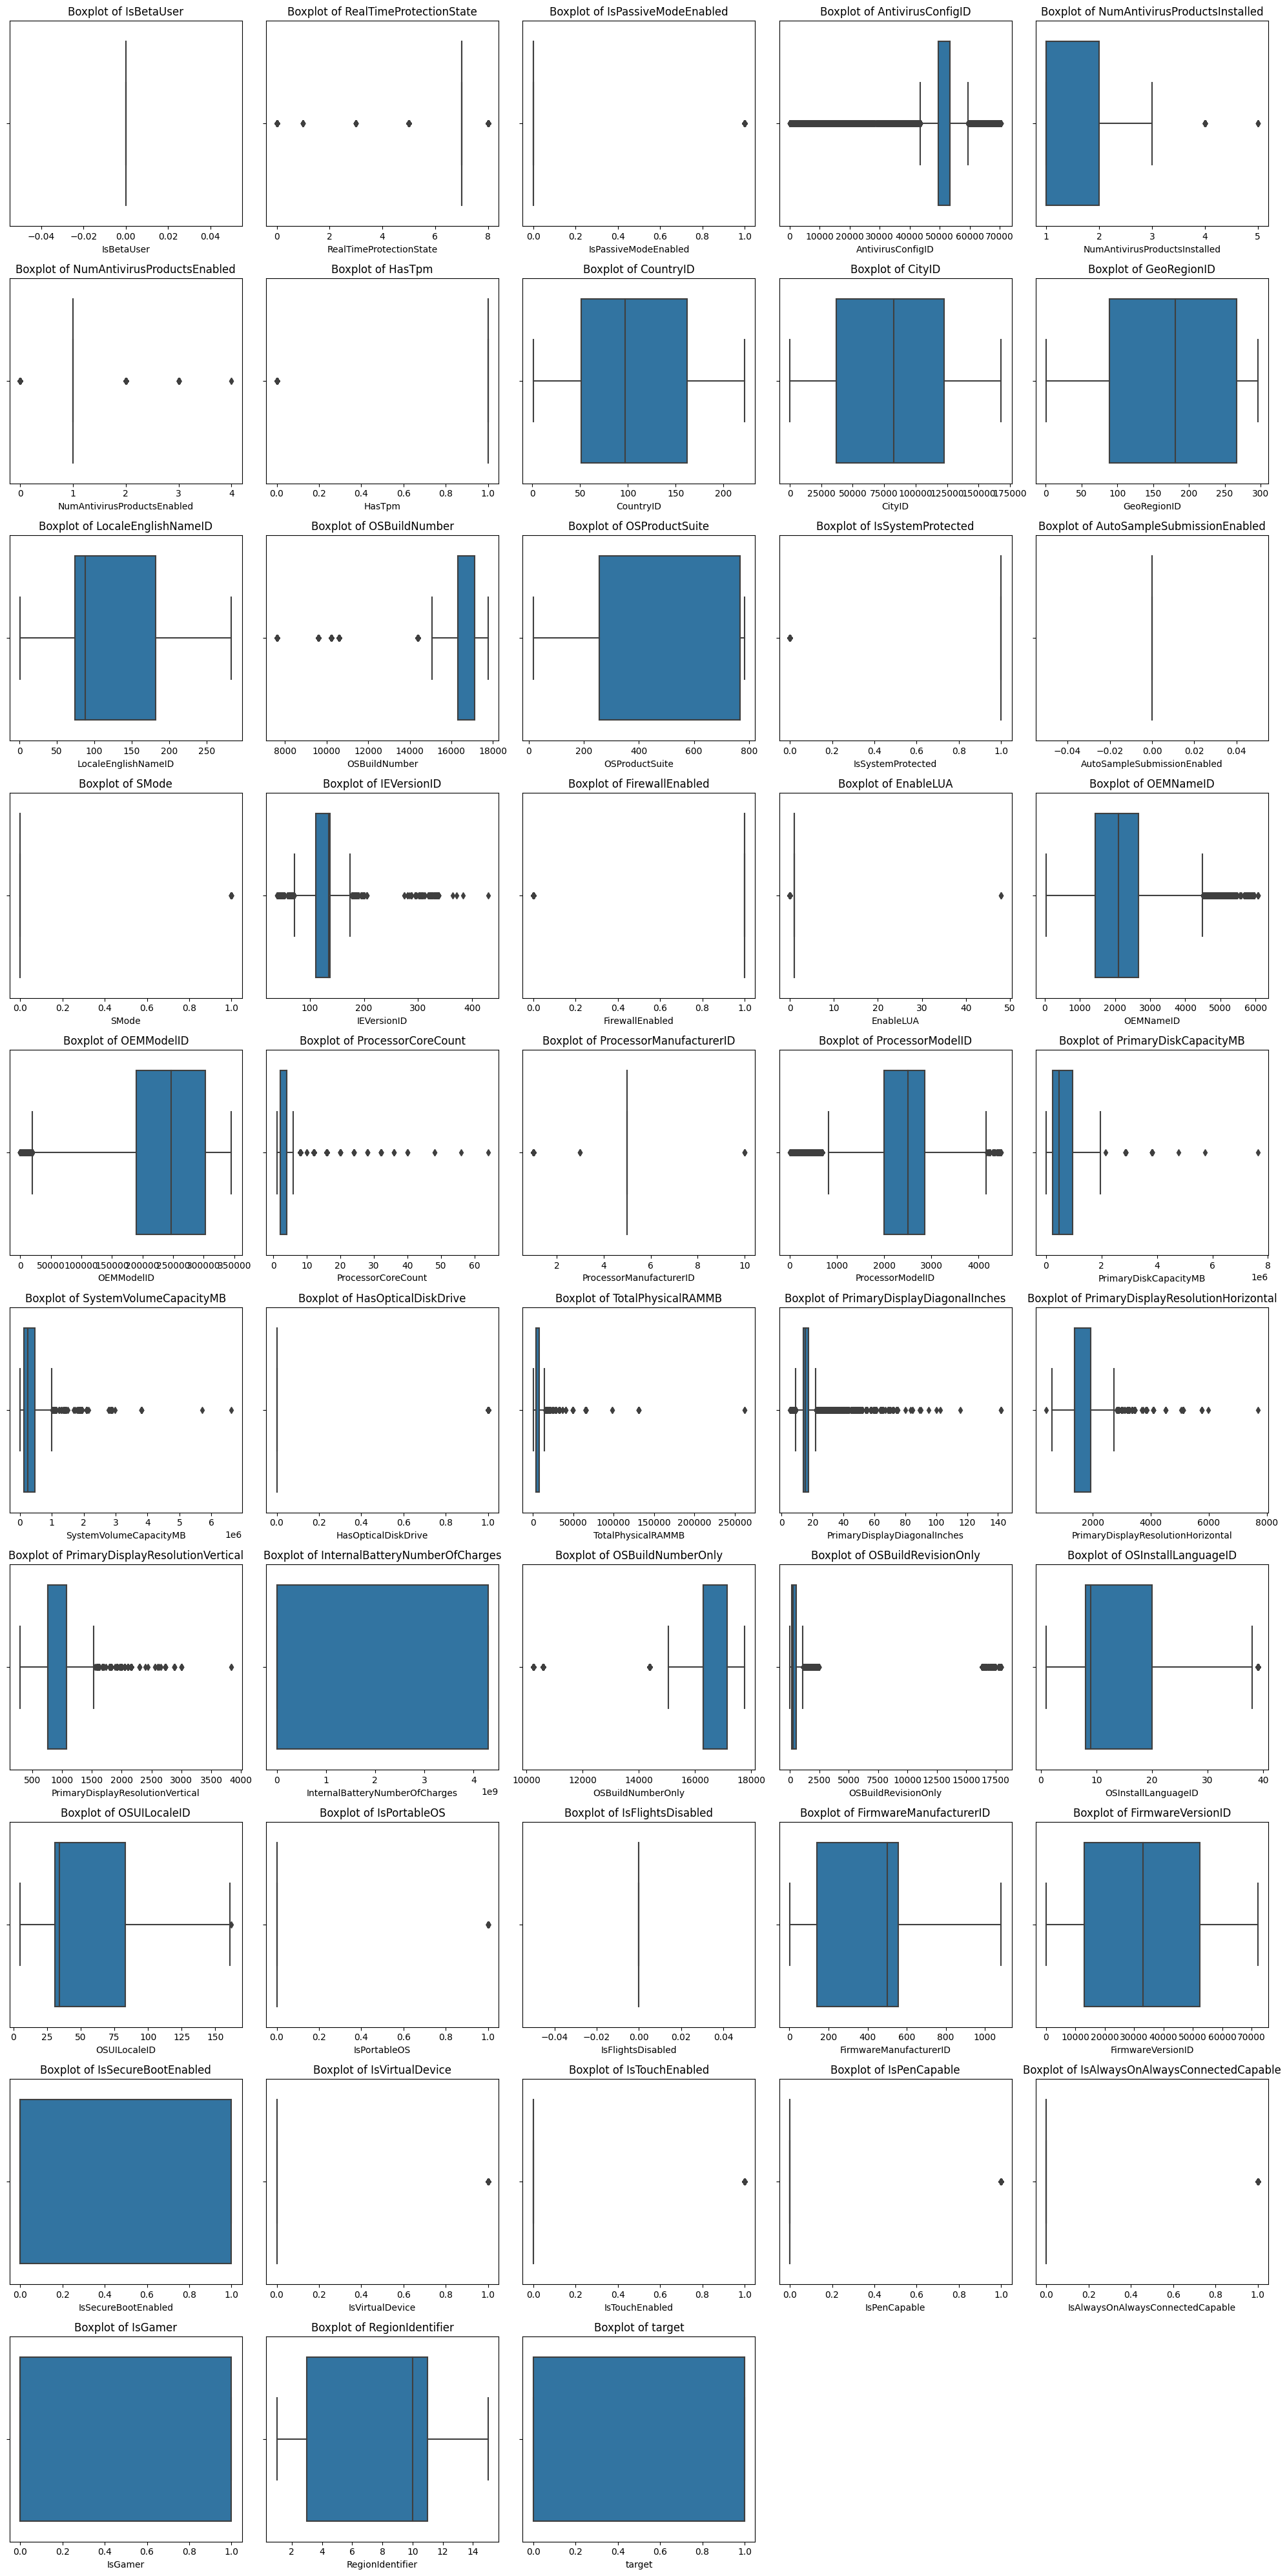

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Define number of rows and columns
num_plots = len(num_cols)
cols = 5  # Maximum 5 plots per row
rows = math.ceil(num_plots / cols)  # Calculate required rows

# Set figure size
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))

# Flatten axes for easy iteration (handles cases with fewer plots)
axes = axes.flatten()

# Loop through columns and plot boxplots
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Hide unused subplots (if any)
for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### **Key Insights from the Box Plots**✨:


### **1️ Presence of Outliers**  
Many features exhibit **significant outliers**, suggesting:
- **Possible data quality issues** – Some extreme values might be errors or need transformation.
- **Skewed distributions** – Features like **ProcessorCoreCount**, **SystemVolumeCapacityMB**, and **InternalBatteryNumberOfCharges** show extreme values.

### **2️ Features with Highly Skewed Distributions**  
Certain features are **highly skewed**, meaning most data points are concentrated within a small range, while a few extreme values stretch the distribution:
- **AntivirusConfigID**, **ProcessorCoreCount**, **SystemVolumeCapacityMB**, and **TotalPhysicalRAMMB** have a **long right tail** (few very large values).
- **FirmwareVersionID**, **OSBuildRevisionOnly**, and **OSBuildNumberOnly** also display a **skewed pattern**.

These features might benefit from **log transformation** or **scaling**.


### **3️ Near Constant or Low Variability Features**  
Some features have almost no variation, indicating they might **not provide useful information** for prediction:
- **IsLightDisabled**, **HasOpticalDiskDrive**, **IsVirtualDevice**, **IsSecureBootEnabled**, and **IsPortableOS** show very little spread.
- Such low-variance features may not contribute much to predictive power and could be removed.



# Exploratory Data Analysis (EDA) Insights and Summary

The Data is provided of a System Threat Forecaster where different Systems and their specifications is provided with a target variable containing the binary values telling us whether the system detected the malware threat or not, where 1 means True, that is system detected the malware attack and 0 means No, the system has not detected any malware attack respectively.

We are tasked to perform our analysis and came up with some good algorithms to detect the future systems attack based on the laptop specifications, as the target variable suggest. It's a classical example of Classification Problem Where we will be classifying the systems to be attacked by malware on not based on the specifications provided about the system.

We have performed the Exploratory Data Analysis on the Dataset and here are the findings below upon the best of my knowledge.

- The Dataset contains 100K Rows and 76 Feature Columns.
- Dataset has 28 Categorical Features and 48 Numerical Columns.
- Out of 48 Numerical Columns the dataset has 14 Binary Columns, that is containing only 2 unique value.
- Dataset also has 165 duplicates rows which we have dropped using df.drop_duplicates() function to overcome from data redundancy.
  
- There are total 6533 missing values in all features including Categorical and Numerical.
- Here in the missing values there are 49 Missing Values in Categorical Features and 6484 in Numerical Features in Total.
- We as a analyst will be using Mode to fill up the missing places in Categorical Features and,
- We will impute the Numerical columns using Mean and Categorical columns using Mode

- We have total 48 Numerical columns, as the numbers are so high we have taken best 30 columns from 48 to plot the graph and check what kind of pattern does they follow on the graph.
- Upon observing the graph we get to know about the fact that there are some imbalancement in the dataset.
- Some columns in our dataset have imbalance frequency of data, We can clearly see that. We will be dropping off that kind of columns, as they won't be contributing in the Algo. Even they will hamper the algorithm learning.
- We have plotted the Correlation Matrix of our Numerical Features to get the idea of irrelevant features.
- We will drop the columns which have correlation almost close to 0 like 0.00, as clearly they are not much correlated with the target variable so they won't be contributing in the algo learning.

#### **1️ Data Distribution and Skewness**  
- Many **numerical features** (e.g., `ProcessorCoreCount`, `TotalPhysicalRAMMB`, `SystemVolumeCapacityMB`) are **right-skewed**, meaning most values are low, with a few extreme high values.  
- Some categorical variables display **multi-modal distributions**, indicating different user groups.  

#### **2️ Presence of Outliers**  
- Several features contain **extreme outliers**, especially `ProcessorCoreCount`, `SystemVolumeCapacityMB`, and `InternalBatteryNumberOfCharges`.  
- These may represent **real-world extreme cases** or **data quality issues** that need handling.  

#### **3️ Binary Features and Imbalance**  
- Features like `IsTouchEnabled`, `IsPenCapable`, and `IsVirtualDevice` are **highly imbalanced** (mostly 0s or 1s).  
- **Security features** (`IsSystemProtected`, `FirewallEnabled`, `RealTimeProtectionState`) are generally enabled in most cases.  

#### **4️ Correlation with Target Variable**  
- **Positively correlated features**: `AutoSampleSubmissionEnabled`, `IsBetaUser`, and `TotalPhysicalRAMMB` are linked to a higher target value.  
- **Negatively correlated features**: `NumAntivirusProductsInstalled`, `IsAlwaysOnAlwaysConnectedCapable`, and `IsVirtualDevice` may decrease the likelihood of the target outcome.  
- **Most features show weak correlations**, meaning some may be dropped during feature selection.  

#### **5️ Feature Engineering Opportunities**   
- **Feature scaling** to normalize wide-ranging values.  
- **Removal of low-variance features** like `IsLightDisabled`, `HasOpticalDiskDrive`, and `IsPortableOS`, which provide minimal predictive value.  

After all this analysis, I came to this conclusion that to tackle this classification problem,
- I'll we using Gradient Boosting Classifier/XG Boost Classifier, SGD Classifier, KNN Classifier as these will be most algorithm for the kind of classification dataset we have.

### Let's make a copy of the dataset so that we can keep working on the dataset without harming the originality of the data for the future requirements.

In [ ]:
cdf = df.copy()
df.shape

(99835, 76)

## Imputing the Missing Values in Features

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [ ]:
cdf

MachineID   ProductName EngineVersion  \
0      f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1      dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2      fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3      38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4      32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   
...                                 ...           ...           ...   
99995  a378b2196a7a1d8ee0d4f989ee46730e  win8defender   1.1.15200.1   
99996  7f4433ca05d24b9bbdd3932f8b05e61f  win8defender   1.1.15100.1   
99997  d6852dfff534e03d5ddfd3c7875ab072  win8defender   1.1.15200.1   
99998  70a8dc682128c9ff78a3de5aea9dac74  win8defender   1.1.14901.4   
99999  ad9c385b53f2ca788933a39603b84eda  win8defender   1.1.15000.2   

             AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0       4.18.1807.18075     1.275.1003.0           0                     7.00   
1       4.18.1807.18075     1.273.1465.0           0                     7.00   
2       4.18.1807.18075     1.275.1546.0           0                     7.00   
3      4.12.17007.18011     1.275.1141.0           0                     7.00   
4        4.13.17134.228     1.275.1283.0           0                     7.00   
...                 ...              ...         ...                      ...   
99995   4.18.1807.18075     1.275.1582.0           0                     7.00   
99996   4.18.1806.18062     1.273.1156.0           0                     7.00   
99997   4.18.1807.18075      1.275.209.0           0                     7.00   
99998  4.16.17656.18052      1.269.641.0           0                     7.00   
99999   4.18.1806.18062     1.271.1003.0           0                     7.00   

       IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                         0           53447.00                           1.00   
1                         0           53447.00                           1.00   
2                         0           53447.00                           1.00   
3                         0           46413.00                           2.00   
4                         0           40466.00                           2.00   
...                     ...                ...                            ...   
99995                     0           68585.00                           2.00   
99996                     0           11280.00                           2.00   
99997                     0           53447.00                           1.00   
99998                     0           53447.00                           1.00   
99999                     0            7945.00                           2.00   

       NumAntivirusProductsEnabled  HasTpm  CountryID    CityID  GeoRegionID  \
0                             1.00       1         51 120232.00        98.00   
1                             1.00       1        141 112854.00       167.00   
2                             1.00       1         51  41759.00        98.00   
3                             1.00       1         68  19507.00       276.00   
4                             1.00       1         43 117801.00        53.00   
...                            ...     ...        ...       ...          ...   
99995                         1.00       1         43  71228.00        53.00   
99996                         1.00       1        137 137066.00       160.00   
99997                         1.00       1        142  74924.00       157.00   
99998                         1.00       1        139  87570.00       158.00   
99999                         1.00       1        100   4110.00       224.00   

       LocaleEnglishNameID PlatformType Processor OSVersion  OSBuildNumber  \
0                      103    windows10       x86  10.0.0.0          14393   
1                      227    windows10       x64  10.0.0.0          17134   
2                      103    window

In [ ]:
numeric_features = X.select_dtypes(exclude=['object']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns
numeric_features

Index(['IsBetaUser', 'RealTimeProtectionState', 'IsPassiveModeEnabled',
       'AntivirusConfigID', 'NumAntivirusProductsInstalled',
       'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID',
       'GeoRegionID', 'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite',
       'IsSystemProtected', 'AutoSampleSubmissionEnabled', 'SMode',
       'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID',
       'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID',
       'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB',
       'HasOpticalDiskDrive', 'TotalPhysicalRAMMB',
       'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges',
       'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID',
       'OSUILocaleID', 'IsPortableOS', 'IsFlightsDisabled',
       'FirmwareManufacturerID', 'FirmwareVersionID', 'IsSecureBootEnabled',
       'IsVirtua

## Imputing the Numericals Columns


In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# === Step 1: Imputation Transformer ===

class ImputationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mean_imputer = SimpleImputer(strategy='mean')
        self.median_imputer = SimpleImputer(strategy='median')
        self.mode_imputer = SimpleImputer(strategy='most_frequent')

    def fit(self, X, y=None):
        """Learn imputation values for numerical and categorical features."""
        X_numeric = X.select_dtypes(exclude=['object', 'category'])
        X_categorical = X.select_dtypes(include=['object', 'category'])

        # Compute skewness and identify which features to impute with mean/median
        skewness = X_numeric.skew()
        self.mean_features = skewness[abs(skewness) < 1].index.tolist()
        self.median_features = skewness[abs(skewness) >= 1].index.tolist()

        # Fit imputers
        if self.mean_features:
            self.mean_imputer.fit(X_numeric[self.mean_features])
        if self.median_features:
            self.median_imputer.fit(X_numeric[self.median_features])
        if not X_categorical.empty:
            self.mode_imputer.fit(X_categorical)

        return self  # Required for scikit-learn compatibility

    def transform(self, X):
        """Apply learned imputation on the dataset."""

        X_numeric = X.select_dtypes(exclude=['object', 'category'])
        X_categorical = X.select_dtypes(include=['object', 'category'])

        # Apply numerical imputation
        if self.mean_features:
            X[self.mean_features] = self.mean_imputer.transform(X_numeric[self.mean_features])
        if self.median_features:
            X[self.median_features] = self.median_imputer.transform(X_numeric[self.median_features])

        # Apply categorical imputation
        if not X_categorical.empty:
            X[X_categorical.columns] = self.mode_imputer.transform(X_categorical)

        return X

### Encoding the Non-Numerical Columns

In [ ]:
# === Step 2: Encoding Transformer ===
# class EncodingTransformer(BaseEstimator, TransformerMixin):/
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd


class EncodingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_encoders = {}  # Dictionary to store label encoders
        self.categorical_cols = []

    def fit(self, X, y=None):
        """Fit Label Encoders for all categorical features."""

        # Identify categorical features
        self.categorical_cols = X.select_dtypes(include=['object', 'category']).columns

        # Fit Label Encoders for all categorical features
        for col in self.categorical_cols:
            le = LabelEncoder()
            le.fit(X[col].astype(str))  # Convert to string to handle NaNs
            self.label_encoders[col] = le

        return self

    def transform(self, X):
        """Apply Label Encoding transformations."""

        X = X.copy()  # Avoid modifying the original dataframe

        for col in self.categorical_cols:
            if col in X.columns:
                X[col] = self.label_encoders[col].transform(X[col].astype(str))

        return X

### Scaling our numerical columns

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
import pandas as pd

class NumericalScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()
        self.numeric_features = None

    def fit(self, X, y=None):
        """Identify numerical columns and fit the scaler."""
        self.numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
        self.scaler.fit(X[self.numeric_features])
        return self

    def transform(self, X):
        """Apply scaling only to numerical columns, keeping the rest unchanged."""

        X[self.numeric_features] = np.round(self.scaler.transform(X[self.numeric_features]), 2)
        return X


## Checking Correlation and Dropping some weak Feature Columns which are not contributing to our prediction

In [ ]:
cdf.head(500)

MachineID   ProductName EngineVersion  \
0    f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1    dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2    fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3    38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4    32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   
5    22f549ef938e3a943854d49c853ba918  win8defender   1.1.15200.1   
6    d197d1b86b9071b50a655bb3b31cc828  win8defender   1.1.15200.1   
7    8e3a7d3fe18b946443f0777060f82ab7  win8defender   1.1.15100.1   
8    bdb0b0d016466c16b3c58ce39da702e1  win8defender   1.1.15100.1   
9    44f4b3df4c9ecc13c4a8f3b61f7a18c8  win8defender   1.1.15200.1   
10   0d4079d72bcc1f61ab5ed121f9f6ac02  win8defender   1.1.15200.1   
11   4b5d5d72789de83901cfbc41016f2ca3  win8defender   1.1.15200.1   
12   17bb5c782dc4701a2883099859aae2a5  win8defender   1.1.15200.1   
13   77d308b8456d01b1179de3aa585ab629  win8defender   1.1.15100.1   
14   19ae442e75fced8b5dae124141a71902  win8defender   1.1.15100.1   
15   aac0b8d5e7dd0cb0999c0d6cc23c7dc6  win8defender   1.1.15100.1   
16   1fa6a08c3fe1a5278de5102bc884b440  win8defender   1.1.15000.2   
17   40257d34f3bfbedf5d77157e745cc20f  win8defender   1.1.15200.1   
18   231972c3c97cd16d19af637459a05f29  win8defender   1.1.15200.1   
19   df36467c6c8dd7aa1360042f5fb45814  win8defender   1.1.15100.1   
20   fcebb3ef7f1e628e184d870c30fbda6e  win8defender   1.1.15200.1   
21   1cb0b063e416e0a5a2496659074edf93  win8defender   1.1.14800.3   
22   b99196521db4af1b0209c84ea286c5fb  win8defender   1.1.15200.1   
23   db50c72e23c76dbf03fb3e5be35b8969  win8defender   1.1.15200.1   
24   5b1b517ce16a8bda6384dbb5e8bda49e  win8defender   1.1.15100.1   
25   9a1f81fface0529f166c8af465d7ccf4  win8defender   1.1.15200.1   
26   53ed25e17360702fd4fbb04156d9e290  win8defender   1.1.15100.1   
27   d3ed36625b7ff919829eeca7da23e493  win8defender   1.1.15200.1   
28   9e53e828d719c4fca795f44fcd73d0ee  win8defender   1.1.15200.1   
29   528cf0666407129ce5b9eca9101b42ab  win8defender   1.1.15200.1   
30   e73edf1e99914cf0348c15bb7f8b0fd4  win8defender   1.1.15100.1   
31   b1d950a1593885bf43ff7113416b98b0  win8defender   1.1.15200.1   
32   9fe47fd07e2dd07c0304712188574c85  win8defender   1.1.15100.1   
33   1b853db6d066f94684727a9bc483dc19  win8defender   1.1.15200.1   
34   60cd638cc4a4f5cbda215a4cdefd0eea  win8defender   1.1.15100.1   
35   5ef252619b3a0205e1c5b69715fab0c5  win8defender   1.1.15100.1   
36   874968bc2b3ec798d73a5a4523e93d55  win8defender   1.1.15200.1   
37   0cca7e92b20a81350397a6c292c7bae7  win8defender   1.1.15100.1   
38   9d4eae61afc491ae9306995ed9cc6254  win8defender   1.1.14901.4   
39   8c4ef9194c6fbc3769145d8889750cb9  win8defender   1.1.15200.1   
40   5c4c2b195d5032f8a2b4801d8efa3bdb  win8defender   1.1.15200.1   
41   c0db4023b4aa2f7ce298c08780d76e9d  win8defender   1.1.15100.1   
42   1b5ef17f9d2ebcffa129e5e307862630  win8defender   1.1.15300.6   
43   8131717f33eec45f0574d7fa0599abb2  win8defender   1.1.15100.1   
44   63b43a169e68bfd2df068cd8b2d21d64  win8defender   1.1.15200.1   
45   bb6eb7203bfc723f938f1e27b47e8750  win8defender   1.1.15200.1   
46   4ca3245a1d7bf315e0a9e7d00ed9f583  win8defender   1.1.15000.2   
47   b7a34ee7a404c2247e33c088a06808c0  win8defender   1.1.15100.1   
48   1b2c82385720c61ed46ec46f8f026c33  win8defender   1.1.15100.1   
49   7b5ce71780a57f1aef530dd4c71cab6b  win8defender   1.1.15200.1   
50   7e951077e9c403cce24950d705cbade2  win8defender   1.1.15200.1   
51   7d9aeae018a59133938cb73f445969d6  win8defender   1.1.15200.1   
52   e9b6f68b530bc0c7d341cca378e483b9  win8defender   1.1.15000.2   
53   ed9076cc76dd422838e202499389aea6  win8defender   1.1.15200.1   
54   44c25c05776c07e2c7af94cf1b4f14e2  win8defender   1.1.15100.1   
55   bfa901de8ea14e7df2e228b8c0e95235  win8defender   1.1.15200.1   
56   b8d77db108e247ee87314fe7687be8e1  win8defender   1.1.15100.1   
57   2c5940b008fea6f4981f7

In [ ]:
cdf.nunique()

MachineID                             99835
ProductName                               2
EngineVersion                            37
AppVersion                               69
SignatureVersion                       2735
IsBetaUser                                1
RealTimeProtectionState                   6
IsPassiveModeEnabled                      2
AntivirusConfigID                      1976
NumAntivirusProductsInstalled             5
NumAntivirusProductsEnabled               5
HasTpm                                    2
CountryID                               220
CityID                                16047
GeoRegionID                             239
LocaleEnglishNameID                     185
PlatformType                              4
Processor                                 3
OSVersion                                 7
OSBuildNumber                            24
OSProductSuite                            7
OsPlatformSubRelease                      9
OSBuildLab                      

In [ ]:
df.shape

(99835, 76)

In [ ]:
cdf.shape

(99835, 76)

In [ ]:
cdf.shape

(99835, 76)

### Removing Highly Correlated Features (Multicollinearity Check)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class DropHighCorrelationFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.9):
        self.threshold = threshold
        self.to_drop = []

    def fit(self, X, y=None):
        """Identify highly correlated features for removal."""
        X = pd.DataFrame(X)  # Ensure X is a DataFrame

        # Compute the absolute correlation matrix
        corr_matrix = X.corr().abs()

        # Select the upper triangle of the correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

        # Identify columns with correlation higher than the threshold
        self.to_drop = [column for column in upper.columns if any(upper[column] > self.threshold)]

        return self  # Return self for pipeline compatibility

    def transform(self, X):
        """Drop previously identified highly correlated features."""
        X = pd.DataFrame(X)  # Ensure X is a DataFrame
        return X.drop(columns=self.to_drop, errors='ignore')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

X = cdf.drop(columns=['target'], errors='ignore')
y = cdf['target']

def preprocessing_pipeline(cdf):
    """Applies Imputation, Encoding, and Scaling."""

    pipeline = Pipeline([
        ('imputation', ImputationTransformer()),  # Handle missing values
        ('encoding', EncodingTransformer()),  # Convert categorical features
        ('scaling', NumericalScaler())  # Scale numerical features
    ])

    cdf_X = pd.DataFrame(cdf)
    X_prep = pipeline.fit_transform(cdf_X)  # Transform features only (y is not used)

    return X_prep  # Return preprocessed X and original y

def feature_selection_pipeline(X):
    """Applies Drop High Correlation and Feature Selection."""

    pipeline = Pipeline([
        ('drop_high_corr', DropHighCorrelationFeatures(threshold=0.9)),  # Drop highly correlated features
        #('feature_selection', SelectKBest(score_func=f_classif, k=15))  # Select top features
        # ('pca_transform', PCATransformer(variance_ratio=0.70))
    ])

    X_fs = pipeline.fit_transform(X)  # Pass both X and y
    return X_fs

# === Apply Pipelines ===
X_prep = preprocessing_pipeline(X)  # Preprocess data
X = feature_selection_pipeline(X_prep)  # Feature selection


# Print transformed shape
print("✅ Shape of X_train after preprocessing:", X_prep.shape)
print("✅ Shape of X_train after feature selection:", X.shape)

✅ Shape of X_train after preprocessing: (99835, 75)
✅ Shape of X_train after feature selection: (99835, 67)


In [ ]:
X.shape

(99835, 67)

In [ ]:
X

MachineID  ProductName  EngineVersion  AppVersion  SignatureVersion  \
0           1.59         0.05           0.40        0.13              0.23   
1           1.25         0.05           0.02        0.13             -0.50   
2           1.69         0.05           0.40        0.13              0.50   
3          -0.97         0.05           0.40       -1.45              0.31   
4          -1.05         0.05           0.40       -0.89              0.34   
...          ...          ...            ...         ...               ...   
99995       0.47         0.05           0.40        0.13              0.53   
99996      -0.02         0.05           0.02       -0.10             -0.70   
99997       1.17         0.05           0.40        0.13              0.73   
99998      -0.21         0.05          -1.15       -0.32             -1.65   
99999       0.61         0.05          -0.37       -0.10             -1.46   

       IsBetaUser  RealTimeProtectionState  AntivirusConfigID  \
0            0.00                     0.15               0.40   
1            0.00                     0.15               0.40   
2            0.00                     0.15               0.40   
3            0.00                     0.15              -0.11   
4            0.00                     0.15              -0.54   
...           ...                      ...                ...   
99995        0.00                     0.15               1.49   
99996        0.00                     0.15              -2.66   
99997        0.00                     0.15               0.40   
99998        0.00                     0.15               0.40   
99999        0.00                     0.15              -2.90   

       NumAntivirusProductsInstalled  NumAntivirusProductsEnabled  HasTpm  \
0                              -0.63                        -0.12    0.06   
1                              -0.63                        -0.12    0.06   
2                              -0.63                        -0.12    0.06   
3                               1.29                        -0.12    0.06   
4                               1.29                        -0.12    0.06   
...                              ...                          ...     ...   
99995                           1.29                        -0.12    0.06   
99996                           1.29                        -0.12    0.06   
99997                          -0.63                        -0.12    0.06   
99998                          -0.63                        -0.12    0.06   
99999                           1.29                        -0.12    0.06   

       CountryID  CityID  GeoRegionID  LocaleEnglishNameID  PlatformType  \
0          -0.90    0.80        -0.80                -0.28         -0.13   
1           0.52    0.65        -0.03                 1.51         -0.13   
2          -0.90   -0.80        -0.80                -0.28         -0.13   
3          -0.64   -1.26         1.19                -0.70         -0.13   
4          -1.03    0.75        -1.31                -1.17         -0.13   
...          ...     ...          ...                  ...           ...   
99995      -1.03   -0.20        -1.31                -1.17         -0.13   
99996       0.46    1.15        -0.11                -0.70         -0.13   
99997       0.54   -0.13        -0.14                -0.79         -0.13   
99998       0.49    0.13        -0.13                -0.70         -0.13   
99999      -0.13   -1.58         0.61                -0.69         -0.13   

       Processor  OSBuildNumber  OSProductSuite  OsPlatformSubRelease  \
0           3.23          -0.78            0.77                 -2.04   
1          -0.31           0.63           -1.30                  0.43   
2          -0.31           0.63            0.77                  0.43   
3          -0.31          -0.44            0.77                 -1.21   
4           3.23           0.63           -1.30                  0.43   
...          

In [ ]:
y

0        0
1        1
2        1
3        1
4        0
        ..
99995    0
99996    0
99997    1
99998    0
99999    0
Name: target, Length: 99835, dtype: int64

In [ ]:
cdf['target'].equals(y)

True

### Fitting our very first model using Linear Regressor, will check the accuracy score and will change the situations accordingly.

In [ ]:
#Applying XGBoost Classifier on the Train Data
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_xgb = XGBClassifier(eval_metric='logloss', random_state=42)

model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_xgb)

Accuracy: 0.6212751039214705


In [ ]:
#Appying the SGDClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_sgd = SGDClassifier(random_state=42)

model_sgd.fit(X_train, y_train)
y_pred = model_sgd.predict(X_test)
accuracy_sgd = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_sgd)


Accuracy: 0.5853658536585366


In [ ]:
#Applyin KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_knn = KNeighborsClassifier()

model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)

Accuracy: 0.5610757750287975


In [ ]:
#Appying DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)

model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_dt)

Accuracy: 0.5447488355787049


### Applying the same models and fitting with grid_search_cv this time in a hope to optimize our algorithms

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
model_xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Define the parameter grid for tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(
    model_xgb,
    param_grid_xgb,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    scoring='accuracy',  # Evaluate using accuracy
    verbose=1
)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best Accuracy:", grid_search_xgb.best_score_)

# Predict on test data
y_pred = grid_search_xgb.best_estimator_.predict(X_test)

# Evaluate accuracy
accuracy_xgb_hpt = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy_xgb_hpt)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Best Accuracy: 0.6266214211587718
Test Accuracy: 0.6258326238293184


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(random_state=42)

# Fit the model
model_gb.fit(X_train, y_train)

# Cross-validation score
cv_scores_gb = cross_val_score(model_gb, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_score_gb = cv_scores_gb.mean()

print("Cross-validation score:", mean_cv_score_gb)

# Make predictions on the test data
y_pred_gb = model_gb.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Test Accuracy:", accuracy_gb)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Cross-validation score: 0.6194694415582325
Test Accuracy: 0.6174418216420153

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.54      0.58     14818
           1       0.61      0.70      0.65     15133

    accuracy                           0.62     29951
   macro avg       0.62      0.62      0.61     29951
weighted avg       0.62      0.62      0.61     29951


Confusion Matrix:
 [[ 7971  6847]
 [ 4611 10522]]


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define SGD Classifier
sgd = SGDClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'loss': ['hinge', 'log_loss'],  # Hinge (SVM), Log Loss (logistic regression)
    'penalty': ['l1', 'l2'],  # L1 (Lasso), L2 (Ridge)
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'max_iter': [1000, 2000],  # Number of iterations
    'learning_rate': ['adaptive'],  # Fix: 'optimal' removed to avoid log_loss conflict
    'eta0': [0.01, 0.1]  # Fix: Required for 'adaptive' learning rate
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(sgd, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Train final model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate model
accuracy_sgd_hpt = accuracy_score(y_test, y_pred)
print("SGD Classifier Accuracy:", accuracy_sgd_hpt)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'adaptive', 'loss': 'log_loss', 'max_iter': 1000, 'penalty': 'l2'}
SGD Classifier Accuracy: 0.595532628837582


## Final Model Fitting
### Test dataframe loading and applying to Pipeline


In [ ]:
train_df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
train_df.head()

MachineID   ProductName EngineVersion  \
0  f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1  dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2  fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3  38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4  32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   

         AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0   4.18.1807.18075     1.275.1003.0           0                     7.00   
1   4.18.1807.18075     1.273.1465.0           0                     7.00   
2   4.18.1807.18075     1.275.1546.0           0                     7.00   
3  4.12.17007.18011     1.275.1141.0           0                     7.00   
4    4.13.17134.228     1.275.1283.0           0                     7.00   

   IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                     0           53447.00                           1.00   
1                     0           53447.00                           1.00   
2                     0           53447.00                           1.00   
3                     0           46413.00                           2.00   
4                     0           40466.00                           2.00   

   NumAntivirusProductsEnabled  HasTpm  CountryID    CityID  GeoRegionID  \
0                         1.00       1         51 120232.00        98.00   
1                         1.00       1        141 112854.00       167.00   
2                         1.00       1         51  41759.00        98.00   
3                         1.00       1         68  19507.00       276.00   
4                         1.00       1         43 117801.00        53.00   

   LocaleEnglishNameID PlatformType Processor OSVersion  OSBuildNumber  \
0                  103    windows10       x86  10.0.0.0          14393   
1                  227    windows10       x64  10.0.0.0          17134   
2                  103    windows10       x64  10.0.0.0          17134   
3                   74    windows10       x64  10.0.0.0          15063   
4                   42    windows10       x86  10.0.0.0          17134   

   OSProductSuite OsPlatformSubRelease  \
0             768                  rs1   
1             256                  rs4   
2             768                  rs4   
3             768                  rs2   
4             256                  rs4   

                                    OSBuildLab SKUEditionName  \
0  14393.2214.x86fre.rs1_release_1.180402-1758           Home   
1     17134.1.amd64fre.rs4_release.180410-1804            Pro   
2     17134.1.amd64fre.rs4_release.180410-1804           Home   
3     15063.0.amd64fre.rs2_release.170317-1834           Home   
4       17134.1.x86fre.rs4_release.180410-1804            Pro   

   IsSystemProtected  AutoSampleSubmissionEnabled  SMode  IEVersionID  \
0               1.00                            0   0.00        98.00   
1               1.00                            0   0.00       137.00   
2               1.00                            0   0.00       137.00   
3               1.00                            0   0.00       108.00   
4               1.00                            0   0.00       137.00   

   FirewallEnabled  EnableLUA MDC2FormFactor     DeviceFamily  OEMNameID  \
0             1.00       1.00    SmallTablet  Windows.Desktop     561.00   
1             1.00       1.00       AllInOne  Windows.Desktop    2668.00   
2             1.00       1.00        Desktop  Windows.Desktop    3035.00   
3             1.00       1.00       Notebook  Windows.Desktop    2102.00   
4             1.00       1.00        Desktop  Windows.Desktop    2668.00   

   OEMModelID  ProcessorCoreCount  ProcessorManufacturerID  ProcessorModelID  \
0   330367.00                4.00                     5.00           1850.00   
1    25212.00                4.00                     5.00           2407.00   
2   263666.00  

In [ ]:
X = train_df.drop(columns=['target'])
y = train_df['target']
X_prep = preprocessing_pipeline(X)  # Preprocess data
X = feature_selection_pipeline(X_prep)  # Feature selection
print("Shape of X_prep is ", X_prep.shape)
print("Shape of X is", X.shape)

Shape of X_prep is  (100000, 75)
Shape of X is (100000, 67)


In [ ]:
test_df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')
test_df.head()

MachineID   ProductName EngineVersion  \
0  c2c61173092ad20db5585ca8c10de6e0  win8defender   1.1.15100.1   
1  2e6bb5362ba1ce897feeb1de5edea686  win8defender   1.1.15100.1   
2  692649baed1c50bb8d051ae7f06e3625  win8defender   1.1.15200.1   
3  2ff95e7d97e9f80ec81c97622dd93ed6  win8defender   1.1.15300.6   
4  256766b4c5011e146f05b323863e08a4  win8defender   1.1.14800.3   

         AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0   4.18.1807.18075     1.273.1276.0           0                     7.00   
1        4.10.209.0      1.273.371.0           0                     7.00   
2   4.18.1807.18075      1.275.263.0           0                     7.00   
3   4.18.1807.18075       1.277.58.0           0                     7.00   
4  4.14.17639.18041      1.267.898.0           0                     7.00   

   IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                     0           53447.00                           1.00   
1                     0           46184.00                           2.00   
2                     0           51954.00                           2.00   
3                     0           41571.00                           2.00   
4                     0           40645.00                           3.00   

   NumAntivirusProductsEnabled  HasTpm  CountryID    CityID  GeoRegionID  \
0                         1.00       1        218 129455.00       224.00   
1                         2.00       1         68 138510.00       276.00   
2                         1.00       1        141 154469.00       167.00   
3                         1.00       1         41 130775.00       240.00   
4                         1.00       1         43  51125.00        53.00   

   LocaleEnglishNameID PlatformType Processor OSVersion  OSBuildNumber  \
0                   16    windows10       x64  10.0.0.0          17134   
1                   74     windows8       x64   6.3.0.0           9600   
2                  227    windows10       x64  10.0.0.0          16299   
3                  217    windows10       x64  10.0.0.0          16299   
4                   42    windows10       x64  10.0.0.0          17134   

   OSProductSuite OsPlatformSubRelease  \
0             256                  rs4   
1             768           windows8.1   
2             768                  rs3   
3             768                  rs3   
4             256                  rs4   

                                          OSBuildLab SKUEditionName  \
0           17134.1.amd64fre.rs4_release.180410-1804            Pro   
1  9600.19067.amd64fre.winblue_ltsb_escrow.180619...           Home   
2  16299.431.amd64fre.rs3_release_svc_escrow.1805...           Home   
3  16299.431.amd64fre.rs3_release_svc_escrow.1805...           Home   
4           17134.1.amd64fre.rs4_release.180410-1804            Pro   

   IsSystemProtected  AutoSampleSubmissionEnabled  SMode  IEVersionID  \
0               1.00                            0   0.00       137.00   
1               1.00                            0   0.00       333.00   
2               1.00                            0   0.00       117.00   
3               1.00                            0   0.00       117.00   
4               1.00                            0   0.00       137.00   

   FirewallEnabled  EnableLUA MDC2FormFactor     DeviceFamily  OEMNameID  \
0             1.00       1.00       Notebook  Windows.Desktop    2102.00   
1             1.00       1.00       Notebook  Windows.Desktop     585.00   
2             1.00       1.00       Notebook  Windows.Desktop    2102.00   
3             1.00       1.00       Notebook  Windows.Desktop    2668.00   
4             1.00       1.00       Notebook  Windows.Desktop    2668.00   

   OEMModelID  ProcessorCoreCount  ProcessorManufacturerID  ProcessorModelID  \
0   249148.00                4.00                     5.00           3026.00   
1   189972.00                2.00                     5.00 

In [ ]:
test_df

MachineID   ProductName EngineVersion  \
0     c2c61173092ad20db5585ca8c10de6e0  win8defender   1.1.15100.1   
1     2e6bb5362ba1ce897feeb1de5edea686  win8defender   1.1.15100.1   
2     692649baed1c50bb8d051ae7f06e3625  win8defender   1.1.15200.1   
3     2ff95e7d97e9f80ec81c97622dd93ed6  win8defender   1.1.15300.6   
4     256766b4c5011e146f05b323863e08a4  win8defender   1.1.14800.3   
...                                ...           ...           ...   
9995  42d3ddb25eeb149517e2b6871b061df4  win8defender   1.1.15200.1   
9996  3d474c494d797cafc2ab1665711f0f91  win8defender   1.1.15100.1   
9997  9aee2fc73af8240a688ceb83d41c0418  win8defender   1.1.15200.1   
9998  a2f8c1f88b78271c38767fe43850b359  win8defender   1.1.15200.1   
9999  c1c85a860e30097b03c815aa908cd17d  win8defender   1.1.15000.2   

            AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0      4.18.1807.18075     1.273.1276.0           0                     7.00   
1           4.10.209.0      1.273.371.0           0                     7.00   
2      4.18.1807.18075      1.275.263.0           0                     7.00   
3      4.18.1807.18075       1.277.58.0           0                     7.00   
4     4.14.17639.18041      1.267.898.0           0                     7.00   
...                ...              ...         ...                      ...   
9995   4.18.1807.18075     1.275.1329.0           0                     7.00   
9996      4.11.15063.0      1.273.894.0           0                     7.00   
9997   4.18.1807.18075      1.275.504.0           0                     7.00   
9998   4.18.1807.18075      1.275.461.0           0                     7.00   
9999   4.18.1806.18062     1.271.1068.0           0                     7.00   

      IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                        0           53447.00                           1.00   
1                        0           46184.00                           2.00   
2                        0           51954.00                           2.00   
3                        0           41571.00                           2.00   
4                        0           40645.00                           3.00   
...                    ...                ...                            ...   
9995                     0           32554.00                           3.00   
9996                     0           53447.00                           1.00   
9997                     0           47238.00                           2.00   
9998                     0           53447.00                           1.00   
9999                     0           41571.00                           2.00   

      NumAntivirusProductsEnabled  HasTpm  CountryID    CityID  GeoRegionID  \
0                            1.00       1        218 129455.00       224.00   
1                            2.00       1         68 138510.00       276.00   
2                            1.00       1        141 154469.00       167.00   
3                            1.00       1         41 130775.00       240.00   
4                            1.00       1         43  51125.00        53.00   
...                           ...     ...        ...       ...          ...   
9995                         1.00       1        207  35702.00       277.00   
9996                         1.00       1        214  15656.00       277.00   
9997                         1.00       1         91 145233.00       125.00   
9998                         1.00       1          9 122291.00        10.00   
9999                         1.00       1         68  80765.00       276.00   

      LocaleEnglishNameID PlatformType Processor OSVersion  OSBuildNumber  \
0                      16    windows10       x64  10.0.0.0          17134   
1                      74     windows8       x64   6.3.0.0           9600   
2                     227    windows10       x64  10.0.0.0          16299   
3        

In [ ]:
#Applying preprocessing_pipeline on test_df
test_df_prep = preprocessing_pipeline(test_df)  # Preprocess data
test_df = feature_selection_pipeline(test_df_prep)  # Feature selection

In [ ]:
test_df.shape

(10000, 68)

In [ ]:
# Checking the columns which are in test_df but not in X
extra_cols = list(set(test_df.columns) - set(X.columns))  # Convert set to list

# Dropping the extra columns from test_df
test_df.drop(columns=extra_cols, inplace=True)
test_df.shape

(10000, 67)

In [ ]:
# Predict on test data
model_xgb.fit(X,y)
y_pred=model_gb.predict(test_df)

submission = pd.DataFrame({"id": range(0,test_df.shape[0]), "target": y_pred})
submission.to_csv('submission.csv',index=False)
print("Submission Successfull")

Submission Successfull


In [ ]:
submission_df = pd.read_csv('/kaggle/working/submission.csv')
submission_df

id  target
0        0       1
1        1       0
2        2       1
3        3       0
4        4       0
...    ...     ...
9995  9995       0
9996  9996       1
9997  9997       0
9998  9998       1
9999  9999       0

[10000 rows x 2 columns]

In [ ]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      10000 non-null  int64
 1   target  10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB


In [ ]:
print(len(y_pred))

10000


#### After running my model on the test dataset provided, I've some similar result with little bit deviation from what i got from the model above i fitted on trainning, which is quite obivious why!

#### Below I'm plotting the graph of test accuracy i achieved after fitting my model on training set

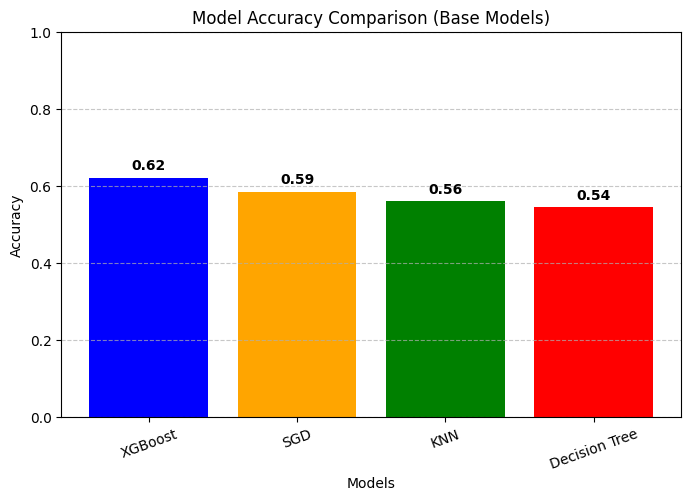

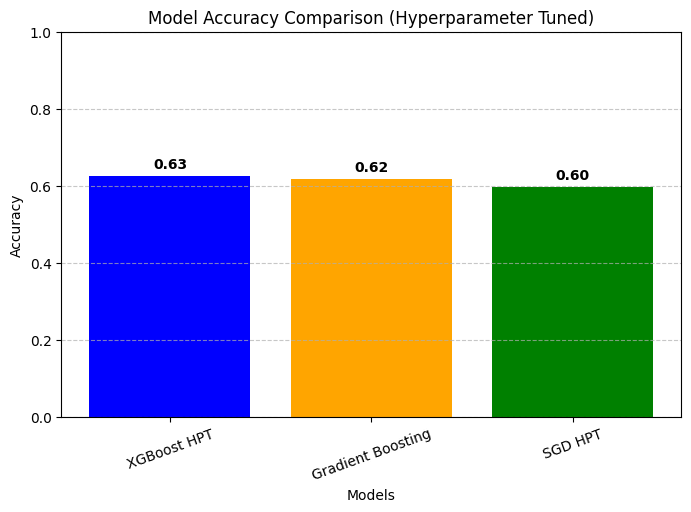

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values for the first set of models
accuracy_values_1 = {
    'XGBoost': accuracy_xgb,
    'SGD': accuracy_sgd,
    'KNN': accuracy_knn,
    'Decision Tree': accuracy_dt
}

# Accuracy values for the second set of models (Hyperparameter Tuned)
accuracy_values_2 = {
    'XGBoost HPT': accuracy_xgb_hpt,
    'Gradient Boosting': accuracy_gb,
    'SGD HPT': accuracy_sgd_hpt
}

def plot_accuracy_bar_chart(accuracy_dict, title):
    """Plots a bar chart comparing accuracy values."""
    models = list(accuracy_dict.keys())
    accuracies = list(accuracy_dict.values())

    plt.figure(figsize=(8, 5))
    plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
    plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
    plt.xlabel("Models")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.xticks(rotation=20)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display accuracy values on bars
    for i, v in enumerate(accuracies):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10, fontweight='bold')

    plt.show()

# Plot first comparison
plot_accuracy_bar_chart(accuracy_values_1, "Model Accuracy Comparison (Base Models)")

# Plot second comparison
plot_accuracy_bar_chart(accuracy_values_2, "Model Accuracy Comparison (Hyperparameter Tuned)")


## Below I'm plotting the result comparison of accuracy i achieved after applying my all models on the test dataset provided

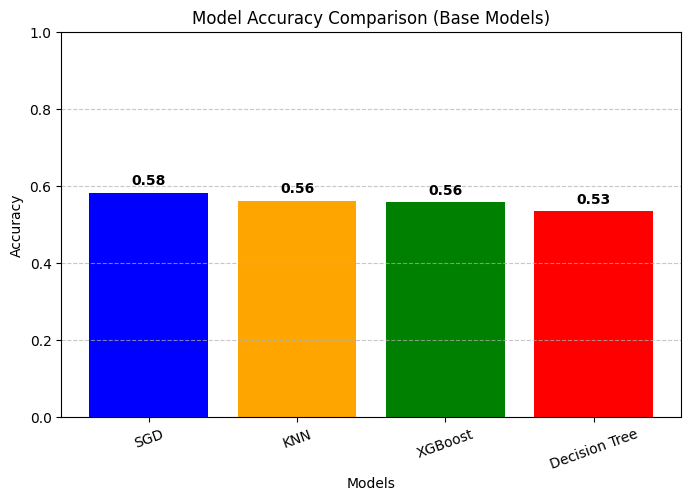

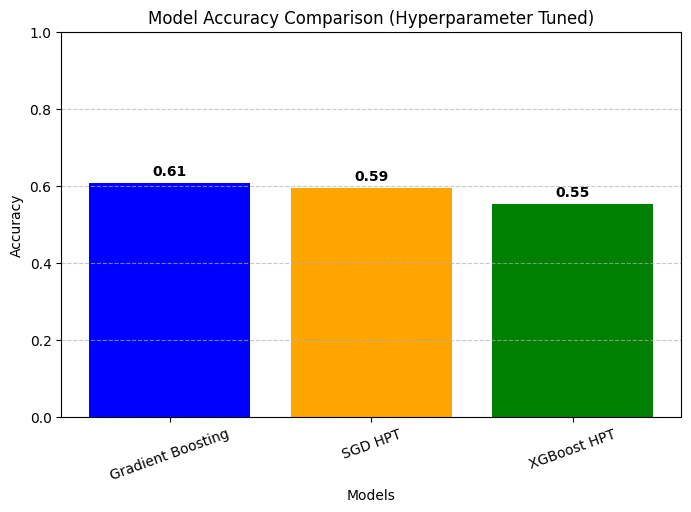

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values on the testing dataset provided by the IIT Madras
accuracy_values_1 = {
    'SGD': 0.58270,
    'KNN': 0.56160,
    'XGBoost': 0.55790,
    'Decision Tree': 0.53370,
}

# Accuracy values for the second set of models (Hyperparameter Tuned)
accuracy_values_2 = {
    'Gradient Boosting': 0.60600,
    'SGD HPT': 0.59270,
    'XGBoost HPT': 0.55130,
}

def plot_accuracy_bar_chart(accuracy_dict, title):
    """Plots a bar chart comparing accuracy values."""
    models = list(accuracy_dict.keys())
    accuracies = list(accuracy_dict.values())

    plt.figure(figsize=(8, 5))
    plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
    plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
    plt.xlabel("Models")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.xticks(rotation=20)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display accuracy values on bars
    for i, v in enumerate(accuracies):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10, fontweight='bold')

    plt.show()

# Plot first comparison
plot_accuracy_bar_chart(accuracy_values_1, "Model Accuracy Comparison (Base Models)")

# Plot second comparison
plot_accuracy_bar_chart(accuracy_values_2, "Model Accuracy Comparison (Hyperparameter Tuned)")


### **Key Insights Comparing Both Base Model Results (Before & After Applying to Test Data):**  

1. **Drop in XGBoost’s Performance:** XGBoost's accuracy dropped from **0.62 to 0.56**, indicating overfitting on the training data.  

2. **SGD is Now the Best Base Model:** SGD has the highest accuracy on test data (**0.58**), showing better generalization compared to others.  

3. **KNN Remains Consistent:** KNN's accuracy stays at **0.56**, suggesting its performance is stable across training and test data.  

4. **Decision Tree Performed the Worst:** Decision Tree accuracy decreased to **0.53**, reinforcing that it overfits and lacks robustness.  

5. **Need for Hyperparameter Tuning:** Since all models saw accuracy drops, hyperparameter tuning is essential to improve generalization on unseen test data.

### **Key Insights from the Hyperparameter Tuning Graph:**  

1. **XGBoost Overfits**: It was the best on training data (0.63) but dropped significantly on test data (0.55), indicating poor generalization.  

2. **Gradient Boosting is Most Reliable**: With minimal accuracy drop (0.62 → 0.61), it generalizes well and remains the best choice for unseen data.  

3. **SGD is Stable but Weaker**: Its accuracy (0.60 → 0.59) remains consistent, but it still underperforms compared to boosting models.  

4. **XGBoost Struggles on Test Data**: Unlike in training, XGBoost now performs the worst on unseen data, showing excessive overfitting.  

5. **Further Optimization Needed**: XGBoost requires better regularization (tree depth tuning, dropout, or early stopping) to improve test performance.  